Importing the dependencies 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# importing the Boston House Price dataset
# house_price_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
# print(house_price_dataset)
# target = label of the dataset
# rest all are the features

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

In [ ]:
# Loading the dataset to the pands DataFrame
# columns because we need to get the name of the columns
# house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns= house_price_dataset.feature_names)

In [ ]:
# house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
house_price_dataframe =  pd.read_csv('housing.csv')

In [ ]:
house_price_dataframe.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,B,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [74]:
house_price_dataframe.shape

(506, 14)

In [75]:
# checking the missing values
house_price_dataframe.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
B          0
lstat      0
price      0
dtype: int64

In [76]:
# Statistical measures of the dataset
house_price_dataframe.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,B,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613778,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601440,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082268,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset

1. Positive correlation

2. Negative correlation

In [77]:
correlation = house_price_dataframe.corr()

<Axes: >

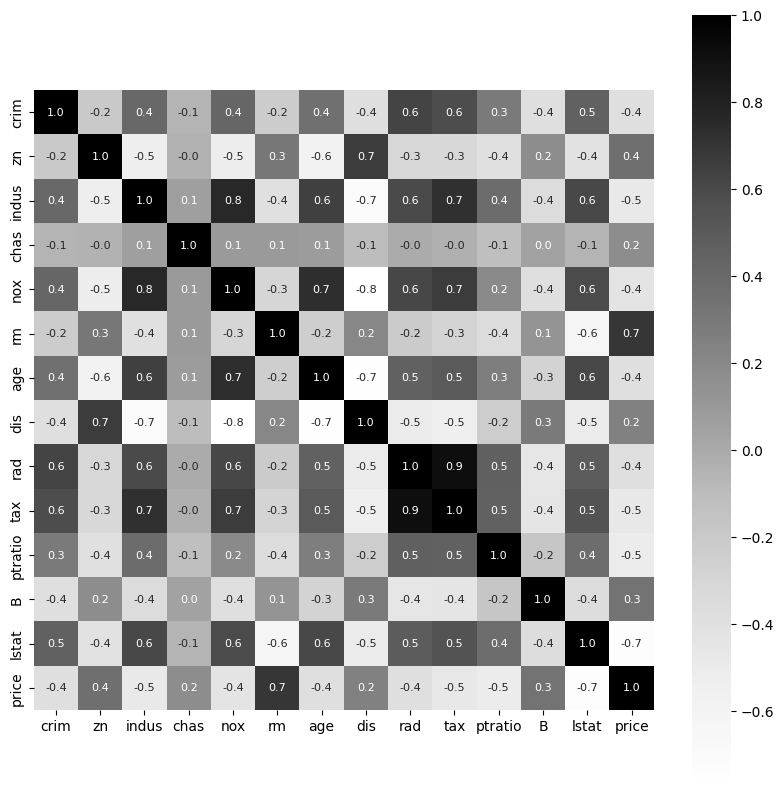

In [78]:
# constructing a heatmap to understand the correlation
# cbar= True -> displays color bar on the right side of the plot
# square= True -> we want all the correlation should be displayed in the proper square
# fmt= '0.1f' -> no of float values you want eg (0.1f = 1.2)
# annot= True -> Displays the value of each block on it
# annot_kws = {size : 8} -> the size of the annotations
# cmap= 'Blues' -> color in blue

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar= True, square= True, fmt= '0.1f', annot= True, annot_kws={'size' : 8}, cmap= 'Greys')

Separating Data and the label

In [79]:
X = house_price_dataframe.drop(columns= 'price', axis= 1)
Y = house_price_dataframe['price']

In [80]:
print(X)
print(Y)

        crim    zn  indus  chas    nox  ...  rad    tax  ptratio       B  lstat
0    0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  ...    1  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  ...    1  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

Train test split

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [83]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

XGBoost Regressor

In [84]:
# It is a type of decision tree algorithm
# Decision tree based ensamble model : (Combines multiple model to produce better results)
# Loading the model
model = XGBRegressor()

Model Evaluation

In [87]:
# Training the model
# model.fit(X_train, Y_train) -> Used to train the model with the help of training feature and training label
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [89]:
# We cannot evaluate the model by using the accuracy score for the regression problem
# metrics is used for regression model evaluation
# Metrcs such as R Squared Error, Mean absolute error

Prediction on training data

In [90]:
# Accuracy for prediction on training data 
training_data_prediction = model.predict(X_train)

In [91]:
print(training_data_prediction)

[23.153181  21.000525  20.100054  34.701355  13.914539  13.497227
 21.996853  15.189645  10.888561  22.695948  13.810725   5.6018496
 29.80337   49.997173  34.895588  20.595005  23.387856  19.19663
 32.70191   19.605175  26.985212   8.40263   46.001198  21.70507
 27.095024  19.375216  19.293526  24.804447  22.5991    31.701416
 18.547922   8.6999235 17.40111   23.702936  13.296491  10.494136
 12.699843  25.000977  19.69862   14.901032  24.221434  24.996704
 14.8994665 17.006042  15.597109  12.699488  24.508919  15.014139
 49.999012  17.517672  21.209572  32.00362   15.60085   22.899008
 19.318546  18.709835  23.29387   37.20171   30.099894  33.11782
 20.993843  49.997723  13.398359   4.996385  16.498877   8.401488
 28.689472  19.499199  20.584614  45.396973  39.80067   33.40106
 19.812948  33.4069    25.285378  49.99802   12.523893  17.44077
 18.606834  22.610783  50.00661   23.813145  23.297298  23.099169
 41.710632  16.114588  31.60959   36.099064   6.9976397 20.37561
 19.995049  12.

Comparing the predicted value with the original value 

i.e -> Original Value(Y_train), Predicted Value(training_data_prediction)

In [101]:
# R squared error (used commonly in regression model)
# metrics.r2score(original value, predicted value)
score_1 = metrics.r2_score(Y_train, training_data_prediction)
# r2_score will find the variance between predicted value (i.e. training_data_prediction) and the original value (i.e. Y_train) from this regression
# so based on the variance between both of these values it will give the R SQUARED VALUE

#Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
# metrics.mean_absolute_error(original value, predicted value)
# It will subtract the predicted value from the original value and provide the mean of it

# printing R SQUARED ERROR
# Lesser the value more accurate the model is
print("R SQUARED ERROR:",score_1)

# Printing Mean Absolute Error
print("MEAN ABSOLUTE ERROR:",score_2)


R SQUARED ERROR: 0.9999979725189272
MEAN ABSOLUTE ERROR: 0.008985121415393277


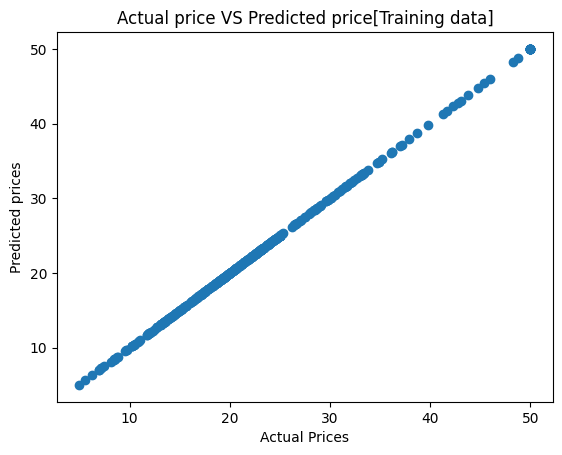

In [108]:
# Visualizing the actual prices and the predicted prices (Training data)
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual price VS Predicted price[Training data]")
plt.show()

If the value is 5 or more then our model is not making good prediction

This is a very good accuracy score

We can get more accuracy and can get very less error values also if we use more data and other models

In this we used XGBoost regressor because we have very less sized dataset (we have only 5 or 6 datapoints)

Typically in the machine learning project we will be having thousands and lakhs of data

More the data more well our model performs

**Test data values are more important than training data**

**Prediction on test data**

In [102]:
test_data_prediction = model.predict(X_test)

In [103]:
print(test_data_prediction)

[21.95986   20.267948  32.45676   28.298004   9.170692  13.834695
 24.886507  27.253626  23.192745  19.566128  26.632864  23.812288
 21.103708  20.48072   13.478534  22.009119  18.589655  10.294663
  8.972148  15.193194  22.438665  20.440413  36.389446  18.250425
 15.56832   18.321695  45.258705  32.90325   34.57562   20.185406
 17.457552  19.729818  29.137054  22.917381  12.737869  19.00691
 10.344435  21.02751   23.163857  22.038616  25.283567  12.188365
 27.833378   7.518272  21.584223  12.600987  34.82112   14.917099
 32.808956  16.157072  30.478119  26.391373   6.8360353 34.37425
 26.849295  20.06449   19.75546   19.63424   16.115948  23.080997
 21.46629   21.032473  19.289549  29.11383   32.241997  25.600014
 48.28209   25.76461    9.801029  22.430185  18.041142   9.0876255
 14.792572  18.519814  26.813707  23.611217  22.161806  21.256779
 18.908175  24.324001  34.129536  18.574682  21.512022  30.164274
 48.38095   36.61919   17.377092  24.838274  28.227577  19.848585
 20.915516 

In [104]:
# R SQUARED ERROR 
score_3 = metrics.r2_score(Y_test, test_data_prediction)

# MEAN ABSOLUTE 
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [105]:
print("R SQUARED ERROR:", score_3)

print("Mean Absolute Error:", score_4)

R SQUARED ERROR: 0.917443818934521
Mean Absolute Error: 1.9591366711784808


Our model is preforming pretty good

Text(0.5, 1.0, 'Actual Price VS Predicted price [Test data]')

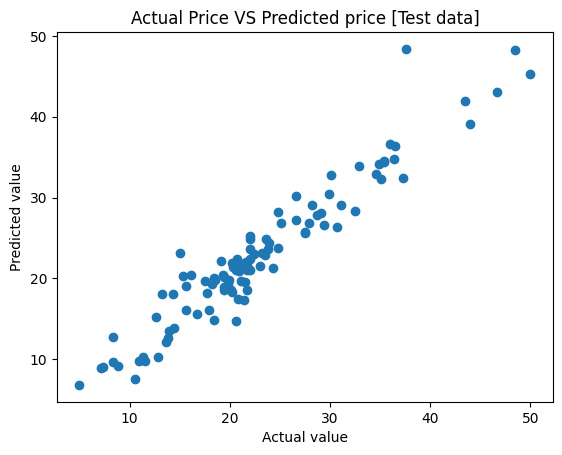

In [109]:
# Visualizing the actual prices and the predicted prices (test data)
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual Price VS Predicted price [Test data]")